# Picking Signals of Interests.
Here we want to find signals that appear interesting from the untouched search. We take an energy detection candidates and use them as SOI's 

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from blimpy import Waterfall
import os

di_list = pd.read_csv("test_file_directory.csv")['names'].to_list()
data_directory_list = pd.read_csv('../data_generator/test_directories.csv')
data_directory_list

,Unnamed: 0,HIP104887-1850,HIP87579-1008
0,0,/mnt_blpd9/datax/dl/GBT_57691_04379_HIP104887_...,/mnt_blpd7/datax/dl/GBT_57907_34727_HIP87579_f...
1,1,/mnt_blpd9/datax/dl/GBT_57691_04732_HIP103749_...,/mnt_blpd7/datax/dl/GBT_57907_35062_HIP87059_f...
2,2,/mnt_blpd9/datax/dl/GBT_57691_05084_HIP104887_...,/mnt_blpd7/datax/dl/GBT_57907_35397_HIP87579_f...
3,3,/mnt_blpd9/datax/dl/GBT_57691_05425_HIP103782_...,/mnt_blpd7/datax/dl/GBT_57907_35736_HIP87225_f...
4,4,/mnt_blpd9/datax/dl/GBT_57691_05766_HIP104887_...,/mnt_blpd7/datax/dl/GBT_57907_36075_HIP87579_f...
5,5,/mnt_blpd9/datax/dl/GBT_57691_06113_HIP103793_...,/mnt_blpd7/datax/dl/GBT_57907_36414_HIP87278_f...


In [84]:
def find_directory(target, data):
    headers = data.columns.to_list()
    headers.pop(0)
    for key in headers:
        li = data[key].to_list()
        if key != "Unnamed: 0" or key != '':
            for el in li:
                if target in el:
                    return el
    return -1

In [117]:
from random import randint
WINDOW = 256*2.89e-6/2

SOI_data = []
SOI_info = {}
for directory in di_list:
    df = pd.read_pickle(directory+"/info_df.pkl")
    stats = df["statistic"].to_list()
    freqs = df['freqs']
    index = randint(0, len(freqs))
    SOI_freq = freqs[index]
    info = pd.read_pickle(directory+"/header.pkl")
    window = info['foff'] *256/2
    file_name = directory.split("/")[-1]
    file_directory = find_directory(file_name, data_directory_list)
    data = Waterfall(file_directory, f_start=SOI_freq+window, f_stop = SOI_freq-window).data
    SOI_data.append(data)
    SOI_info[file_name] = {"freq":SOI_freq, "start":SOI_freq+window,"end":SOI_freq-window,
                          "directory":file_directory, "stats":stats[index]}


In [118]:
import pickle

with open('SOI.pkl', 'wb') as handle:
    pickle.dump(SOI_info, handle, protocol=pickle.HIGHEST_PROTOCOL)


Text(1.11, 0.5, 'Power [normalized]')

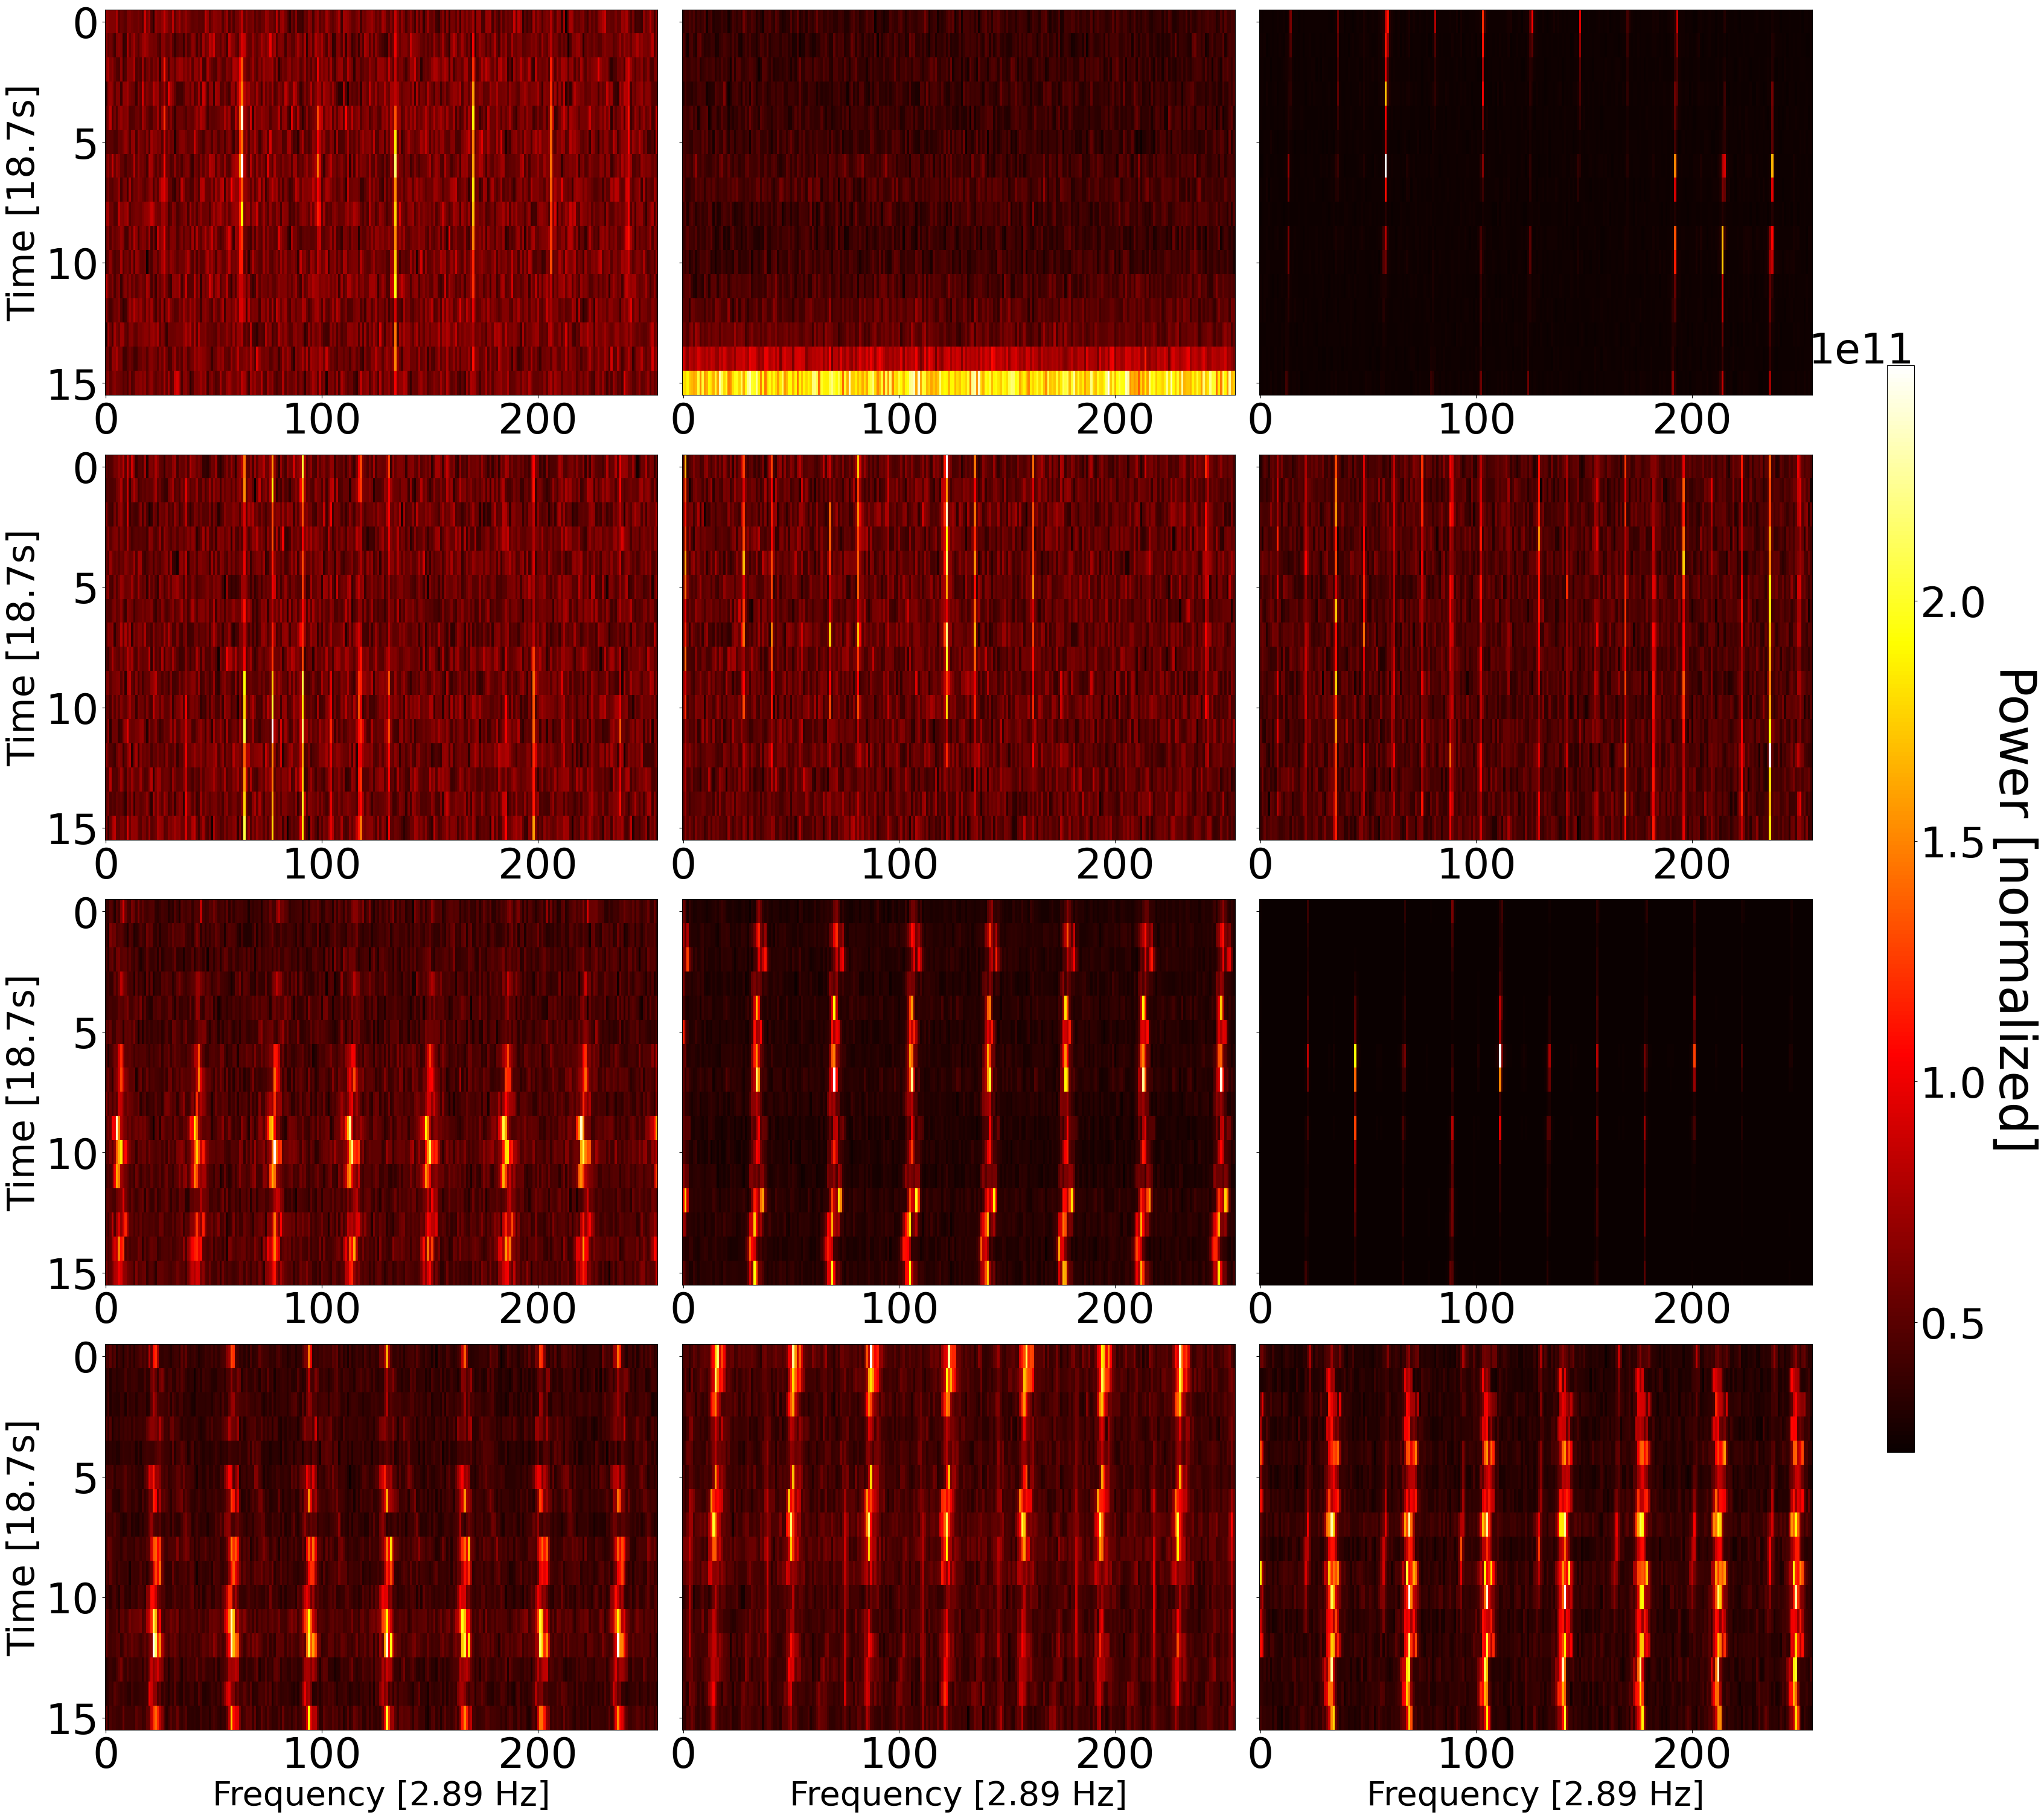

In [119]:
%matplotlib inline
font_size = 50
plt.rcParams.update({'font.size': font_size})

f, ax = plt.subplots(4, 3, sharey=True, figsize=(30, 30), constrained_layout=True)

for j in range(4):
    for i in range(3):
        data = SOI_data[(j*3)+i]
        im = ax[j,i].imshow(data[:, 0,:], cmap='hot', interpolation='nearest', aspect="auto")
        if j == 3:
            ax[j,i].set_xlabel("Frequency [2.89 Hz]",  fontsize=font_size-10)  
        if i ==0:
            ax[j,i].set_ylabel("Time [18.7s]",  fontsize=font_size-5)  
                   
cbaxes = f.add_axes([1.04, 0.2, 0.015, 0.6]) 
cbar = f.colorbar(im, cax=cbaxes)
cbar.ax.tick_params(labelsize=font_size)
f.text(1.11, 0.5, 'Power [normalized]', ha='center', va='center', rotation=270, 
       fontsize=font_size+10)

# plt.savefig("plots/SOI.pdf", format="pdf")